# 9.4 Python 编程实践———手写数字识别分析

### 1. 安装和导入所需包

In [1]:
# 需要安装TesnforFlow包
    # pip install  tensorflow --user
    

In [2]:
import numpy as np
from tensorflow import keras
    # keras已并入tenforflow
    
import matplotlib.pylab as plt

In [3]:
# 本文件为教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）的配套代码。

### 2. 读入并查看数据集_MNIST数据集

![MnistDataset.png](MnistDataset.png)

In [4]:
#读入MNIST数据集
    #来源：http://yann.lecun.com/exdb/mnist/
    #提供者：纽约大学的Yann LeCun等
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [6]:
#查看训练集的形状
x_train.shape,y_train.shape


((60000, 28, 28), (60000,))

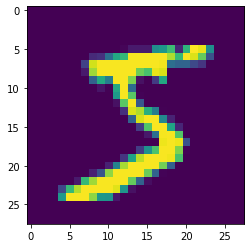

In [7]:
#显示图片
plt.imshow(x_train[0])

In [8]:
y_train[0]

5

### 3.定义输入层和输出层

In [9]:
#输入层
input_shape = (28, 28, 1) 
 
    
    
#输出层
num_classes = 10
 

### 4.数据预处理

In [10]:
 
print(x_train.shape)

(60000, 28, 28)


In [11]:
x_train[1]
 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
# （1）数据标准化——将图像缩放到[0,1]范围
 
    
x_train = x_train.astype("float32") / 255

x_test = x_test.astype("float32") / 255


In [13]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [14]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
#（2）将数据形状改为 (28, 28, 1)
  
x_train = np.expand_dims(x_train, -1)
   
x_test = np.expand_dims(x_test, -1)
   
print("x_train shape:", x_train.shape)

print(x_train.shape[0], "train samples")

print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [16]:
#输出y_train
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
#（3）将类别标签转换为onehot编码，为将向量转化成二维矩阵
 
    
y_train = keras.utils.to_categorical(y_train
                                     , num_classes)
    #Converts a class vector (integers) to binary class matrix.
    
y_test = keras.utils.to_categorical(y_test
                                    , num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### 5.定义学习框架

In [18]:
#模型参数的定义
num_filters_1 = 32

num_filters_2 = 64

num_strides = 1

kernel_size=(3,3)


In [19]:
model = keras.Sequential(  
     [
        keras.Input(shape=input_shape), #输入层
        
        #第一次卷积与池化过程
        keras.layers.Conv2D(
                #输入图片为2d
            filters = num_filters_1
            
            , kernel_size = kernel_size
            
            , strides = num_strides
            
            ,  padding = "valid"
            
            , activation="relu"
            
            , use_bias=True, #偏置项
            
            bias_initializer=keras.initializers.Zeros()
                #bias_initializer:用于偏置向量的初始化
        ),
        
       #最大池化层
        keras.layers.MaxPooling2D(
            
            pool_size=(2, 2)
            
            , strides=None
            
            , padding="valid"),
        
        #第二次卷积与池化过程
        keras.layers.Conv2D(
            
            filters = num_filters_2
            
            , kernel_size = kernel_size, 
            
            strides = num_strides ,
            
            padding="valid",
            
            activation="relu"),
         
        keras.layers.MaxPooling2D(
            
            pool_size=(2, 2)
            
            , strides=None
            
            , padding="valid"),
        
        #扁平化输出（全连接之前）
        keras.layers.Flatten(),
           
        
        #dropput层
        keras.layers.Dropout(rate = 0.5),
            
        
        #全连接层

        keras.layers.Dense(
               units = num_classes #输出空间维数，等于分类数
               , activation="softmax"),  
      
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [20]:
# help(keras.layers.MaxPooling2D)

In [21]:
# help(keras.layers.Conv2D)

### 6.训练模型

In [22]:
model.compile(
    #损失函数 
    loss="categorical_crossentropy",
    
    #优化器 
    optimizer="adam",
    
    #评价标准 
    metrics=["accuracy"])

#batch的大小
batch_size = 128 #"None"默认为32

#epock的次数
epochs = 10

hist=model.fit(x_train
               , y_train
               , batch_size=batch_size
               , epochs=epochs
               , validation_split=0.1,
  )

Epoch 1/10
422/422 [==============================] - 16s 37ms/step - loss: 0.3619 - accuracy: 0.8915 - val_loss: 0.0837 - val_accuracy: 0.9782
Epoch 2/10
422/422 [==============================] - 16s 37ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 0.0557 - val_accuracy: 0.9853
Epoch 3/10
422/422 [==============================] - 16s 39ms/step - loss: 0.0856 - accuracy: 0.9735 - val_loss: 0.0493 - val_accuracy: 0.9865
Epoch 4/10
422/422 [==============================] - 19s 44ms/step - loss: 0.0731 - accuracy: 0.9772 - val_loss: 0.0433 - val_accuracy: 0.9873
Epoch 5/10
422/422 [==============================] - 24s 57ms/step - loss: 0.0624 - accuracy: 0.9813 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 6/10
422/422 [==============================] - 25s 60ms/step - loss: 0.0586 - accuracy: 0.9820 - val_loss: 0.0413 - val_accuracy: 0.9872
Epoch 7/10
422/422 [==============================] - 28s 65ms/step - loss: 0.0537 - accuracy: 0.9832 - val_loss: 0.0342 - val_accuracy:

### 7.评价模型

In [23]:
#评价方法
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
print(score)

Test loss: 0.029966678470373154
Test accuracy: 0.9907000064849854
[0.029966678470373154, 0.9907000064849854]


In [24]:
# help(model.evaluate)

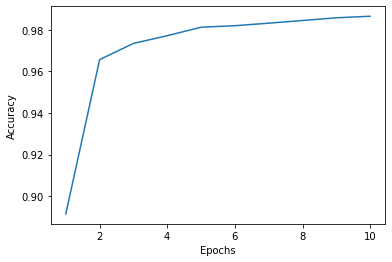

In [25]:
plt.plot(range(1, epochs+1), hist.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [26]:
hist.history

{'loss': [0.36185139417648315,
  0.11272377520799637,
  0.085589200258255,
  0.07308544963598251,
  0.06241832301020622,
  0.0586356483399868,
  0.053713832050561905,
  0.04787353798747063,
  0.04551064223051071,
  0.042107295244932175],
 'accuracy': [0.8914999961853027,
  0.965666651725769,
  0.9734814763069153,
  0.9771851897239685,
  0.981259286403656,
  0.9819814562797546,
  0.9832037091255188,
  0.9844814538955688,
  0.9857962727546692,
  0.9865370392799377],
 'val_loss': [0.08368151634931564,
  0.055741555988788605,
  0.04929093271493912,
  0.043264634907245636,
  0.03808965906500816,
  0.04130489006638527,
  0.03423002362251282,
  0.030592551454901695,
  0.03091738559305668,
  0.03443184867501259],
 'val_accuracy': [0.9781666398048401,
  0.9853333234786987,
  0.9865000247955322,
  0.987333357334137,
  0.9893333315849304,
  0.9871666431427002,
  0.9901666641235352,
  0.9916666746139526,
  0.9906666874885559,
  0.9901666641235352]}

In [27]:
# 预测结果
prediction=model.predict(x_test[:1])
print(prediction)
# 7的概率最大

[[2.3183873e-09 7.8283935e-11 4.4488720e-06 1.2799275e-05 1.8743819e-12
  2.2937592e-10 2.1379630e-16 9.9998164e-01 4.3651156e-08 1.2029121e-06]]


In [28]:
#显示预测标签结果
list(prediction[0]).index((prediction[0].max()))

7